In [1]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

import keras
import tensorflow

import numpy as np
import numba
from numba import jit, prange

rng = np.random.default_rng()


In [3]:
# list of all file names in directory and subdirectories
directory = '../../../../Desktop/BatchCreatedFiles/Harmonic/'


# truth_dir = 



file_list = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".h5"):
            file_list.append(os.path.join(root, file))

print(len(file_list))


3713


In [4]:
print(file_list)


fft_data = []
carrier_data = []
pitch_angle_data = []

for i, file in enumerate(file_list):
    strings, attributes, attributes_values = get_attributes(file, full_path=True)
    signal = get_signal(file, strings[0])
    
    carrier_data.append(attributes_values[0][2])
    pitch_angle_data.append(attributes_values[0][5])
    
    fft = np.fft.fft(signal, norm='forward')
    
    fft_len = len(fft)
    fft = np.abs(fft[0:fft_len//2])
    
    # normalise fft for max of 1
    fft = fft / np.max(fft)
    
    fft_data.append(fft)
    
    if i % 100 == 0:
        print("Processed", i, "files")
        
print("Shape of fft_data:", np.shape(fft_data))
print("Shape of carrier_data:", np.shape(carrier_data))

['../../../../Desktop/BatchCreatedFiles/Harmonic/89.9deg_x0.00090/out_72322313-628b-49d5-98ea-30092d476c8d.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.9deg_x0.00405/out_5ea119f4-879b-4b81-a2a4-20b6bf0d96d5.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.1deg_x0.00335/out_d48a40fc-f4f9-41d1-88b1-9c84719c50c0.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.6deg_x0.00320/out_e1f003b5-d258-48c6-936b-3cb6c76777f4.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.2deg_x0.00310/out_ed6c23d8-d2c8-422d-a095-cc6ea811522e.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.5deg_x0.00305/out_fb425a53-8773-44c8-a7e9-2f4fd7bd66ab.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/89.6deg_x0.00195/out_9c0de879-7e39-4dc5-9be8-b0cc6f22d77a.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.6deg_x0.00500/out_cb4e57ab-eeee-4423-b5cf-5e29296eb595.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/90.0deg_x0.00025/out_04b05ddb-6032-4e38-8244-83ec53510e5e.h5', 

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example: Randomly generated FFT data for demonstration (replace with actual data)
X = np.array(fft_data)  # 1000 FFT samples with length 20480
y = np.array(carrier_data)
z = np.array(pitch_angle_data)  # Random main band frequencies (example range))

# # Reshaping input data to have a single channel
# X = X[..., np.newaxis]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, z_train.shape, z_test.shape)

# Train the model


(2970, 20480) (743, 20480) (2970,) (743,) (2970,) (743,)


In [13]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=50, max_depth=6, early_stopping_rounds=10, learning_rate=0.1)

# Train model
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} bins")

# Example of finding predicted peak frequency index
predicted_peak = np.round(y_pred).astype(int)


[0]	validation_0-mae:15759986.55182
[1]	validation_0-mae:14689231.67699
[2]	validation_0-mae:13676572.69448
[3]	validation_0-mae:12737734.57873
[4]	validation_0-mae:11941190.04038
[5]	validation_0-mae:11248877.44818
[6]	validation_0-mae:10622652.66218
[7]	validation_0-mae:10069272.48452
[8]	validation_0-mae:9522997.00673
[9]	validation_0-mae:9050271.69852
[10]	validation_0-mae:8638095.54778
[11]	validation_0-mae:8244761.73351
[12]	validation_0-mae:7901791.90310
[13]	validation_0-mae:7559572.95289
[14]	validation_0-mae:7256014.56797
[15]	validation_0-mae:6987761.57201
[16]	validation_0-mae:6756317.45895
[17]	validation_0-mae:6563690.16420
[18]	validation_0-mae:6393258.75639
[19]	validation_0-mae:6219986.16420
[20]	validation_0-mae:6081963.60700
[21]	validation_0-mae:5961923.67160
[22]	validation_0-mae:5828622.47106
[23]	validation_0-mae:5691970.07806
[24]	validation_0-mae:5591168.59219
[25]	validation_0-mae:5487862.30956
[26]	validation_0-mae:5418843.87618
[27]	validation_0-mae:5350108.

In [8]:
X_train.shape

(2970, 20480, 1)

Mean Absolute Error on Test Data: 4634204.40958977


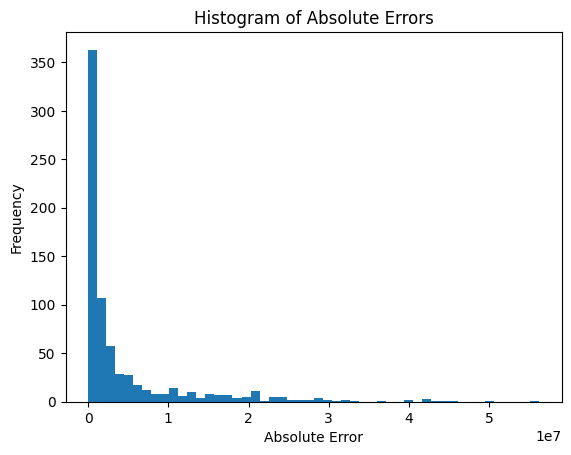

(array([ 43,  44,  46,  50,  52,  60,  99, 126, 158, 160, 195, 198, 233,
       263, 264, 292, 335, 364, 383, 386, 411, 441, 509, 516, 580, 610,
       615, 637, 652, 678, 696, 699]),)
Pitch Angle Range: 86.5 to 87.0
Mean Absolute Error: 10437062.850964697
(array([ 34,  39,  76, 130, 148, 176, 179, 303, 430, 498, 505, 521, 545,
       554, 558, 621]),)
Pitch Angle Range: 87.0 to 87.5
Mean Absolute Error: 3379904.176834288
(array([  6,  65,  74,  79, 169, 172, 175, 229, 240, 251, 256, 258, 282,
       425, 474, 492, 568, 597, 602, 660, 688]),)
Pitch Angle Range: 87.5 to 88.0
Mean Absolute Error: 3884904.1067048693
(array([ 36, 156, 166, 167, 220, 232, 269, 274, 317, 330, 350, 353, 369,
       382, 417, 429, 434, 457, 491, 556, 570, 643, 695]),)
Pitch Angle Range: 88.0 to 88.5
Mean Absolute Error: 4059858.7433258924
(array([ 21,  41, 129, 137, 183, 187, 206, 321, 344, 349, 420, 438, 446,
       472, 527, 542, 549, 581, 612, 674, 724]),)
Pitch Angle Range: 88.5 to 89.0
Mean Absolute Error

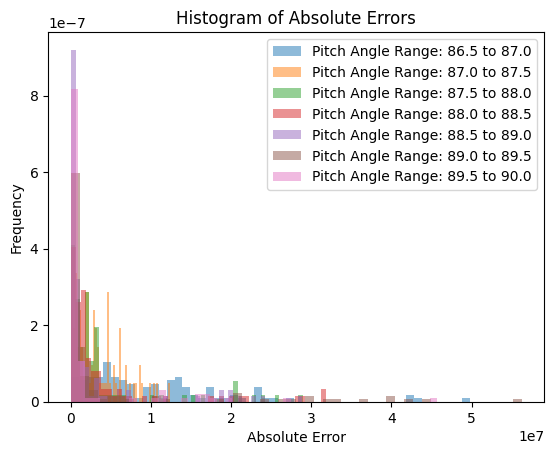

In [20]:
# predict on all test data

predictions = xgb_model.predict(X_test)

differences = np.abs(predictions.flatten() - y_test)

print("Mean Absolute Error on Test Data:", np.mean(differences))

hist_vals = differences

plt.hist(differences, bins=50)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.show()

pitch_angle_range = np.arange(86.5, 90.5, 0.5)

# get predictions for each pitch angle range

for i in range(len(pitch_angle_range) - 1):
    lower_bound = pitch_angle_range[i]
    upper_bound = pitch_angle_range[i + 1]
    
    indices = np.where((z_test >= lower_bound) & (z_test < upper_bound))[0]
    
    lower_ind = np.where(z_test == lower_bound)
    
    print(lower_ind)
    
    if len(indices) == 0:
        continue
    
    print("Pitch Angle Range:", lower_bound, "to", upper_bound)
    
    subset_X = X_test[indices]
    subset_y = y_test[indices]
    
    predictions = xgb_model.predict(subset_X)
    
    differences = np.abs(predictions.flatten() - subset_y)
    
    print("Mean Absolute Error:", np.mean(differences))
    
    plt.hist(differences,alpha=0.5, bins=50, label="Pitch Angle Range: " + str(lower_bound) + " to " + str(upper_bound), density=True)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.legend()
plt.show()
    


In [21]:
# save histogram data to npy file
np.save("XGBoost_histogram_data.npy", hist_vals)


(array([584.,  59.,  35.,  28.,  16.,  10.,   1.,   7.,   2.,   1.]),
 array([2.01256438e+03, 5.62569190e+06, 1.12493712e+07, 1.68730506e+07,
        2.24967299e+07, 2.81204092e+07, 3.37440886e+07, 3.93677679e+07,
        4.49914472e+07, 5.06151266e+07, 5.62388059e+07]),
 <BarContainer object of 10 artists>)

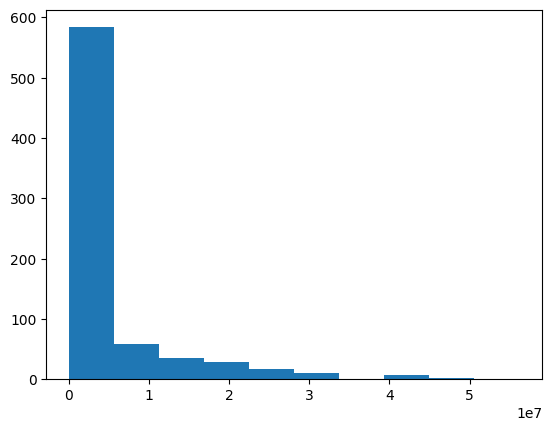

In [22]:
plt.hist(hist_vals)

In [36]:
print(file_list)


fft_data = []
carrier_data = []
pitch_angle_data = []

for i, file in enumerate(file_list):
    strings, attributes, attributes_values = get_attributes(file, full_path=True)
    signal = get_signal(file, strings[0])
    
    R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5

    npower = kb * T * bw
    tau_1t = npower * R
    noise_time = np.random.normal(0, np.sqrt(tau_1t), Nsamp)
    
    signal = signal + noise_time
    
    carrier_data.append(attributes_values[0][2])
    pitch_angle_data.append(attributes_values[0][5])
    
    fft = np.fft.fft(signal, norm='forward')
    
    fft_len = len(fft)
    fft = np.abs(fft[0:fft_len//2])
    
    # normalise fft for max of 1
    fft = fft / np.max(fft)
    
    fft_data.append(fft)
    
    if i % 100 == 0:
        print("Processed", i, "files")
        
print("Shape of fft_data:", np.shape(fft_data))
print("Shape of carrier_data:", np.shape(carrier_data))

['../../../../Desktop/BatchCreatedFiles/Harmonic/89.9deg_x0.00090/out_72322313-628b-49d5-98ea-30092d476c8d.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.9deg_x0.00405/out_5ea119f4-879b-4b81-a2a4-20b6bf0d96d5.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.1deg_x0.00335/out_d48a40fc-f4f9-41d1-88b1-9c84719c50c0.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.6deg_x0.00320/out_e1f003b5-d258-48c6-936b-3cb6c76777f4.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.2deg_x0.00310/out_ed6c23d8-d2c8-422d-a095-cc6ea811522e.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.5deg_x0.00305/out_fb425a53-8773-44c8-a7e9-2f4fd7bd66ab.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/89.6deg_x0.00195/out_9c0de879-7e39-4dc5-9be8-b0cc6f22d77a.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.6deg_x0.00500/out_cb4e57ab-eeee-4423-b5cf-5e29296eb595.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/90.0deg_x0.00025/out_04b05ddb-6032-4e38-8244-83ec53510e5e.h5', 

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example: Randomly generated FFT data for demonstration (replace with actual data)
X = np.array(fft_data)  # 1000 FFT samples with length 20480
y = np.array(carrier_data)
z = np.array(pitch_angle_data)  # Random main band frequencies (example range))

# # Reshaping input data to have a single channel
# X = X[..., np.newaxis]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, z_train.shape, z_test.shape)

# Train the model


(2970, 20480) (743, 20480) (2970,) (743,) (2970,) (743,)


In [42]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=50, max_depth=6, early_stopping_rounds=10, learning_rate=0.1)

# Train model
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} bins")

# Example of finding predicted peak frequency index
predicted_peak = np.round(y_pred).astype(int)


[0]	validation_0-mae:16607729.90579
[1]	validation_0-mae:16535994.18573
[2]	validation_0-mae:16458716.14536
[3]	validation_0-mae:16375599.93540
[4]	validation_0-mae:16300258.07806
[5]	validation_0-mae:16292266.01346
[6]	validation_0-mae:16223454.10498
[7]	validation_0-mae:16152241.76581
[8]	validation_0-mae:16099839.70929
[9]	validation_0-mae:16054820.11306
[10]	validation_0-mae:16021424.64603
[11]	validation_0-mae:15981191.16016
[12]	validation_0-mae:15948555.03634
[13]	validation_0-mae:15992843.88694
[14]	validation_0-mae:15993051.58546
[15]	validation_0-mae:15981218.61642
[16]	validation_0-mae:15954847.64468
[17]	validation_0-mae:15931205.94347
[18]	validation_0-mae:15939301.82503
[19]	validation_0-mae:15941538.49798
[20]	validation_0-mae:15917643.34859
[21]	validation_0-mae:15930436.04845
[22]	validation_0-mae:15943986.90713
[23]	validation_0-mae:15962365.63122
[24]	validation_0-mae:15947058.18573
[25]	validation_0-mae:15990778.40108
[26]	validation_0-mae:16006699.42396
[27]	valida

Mean Absolute Error on Test Data: 15917643.362453282


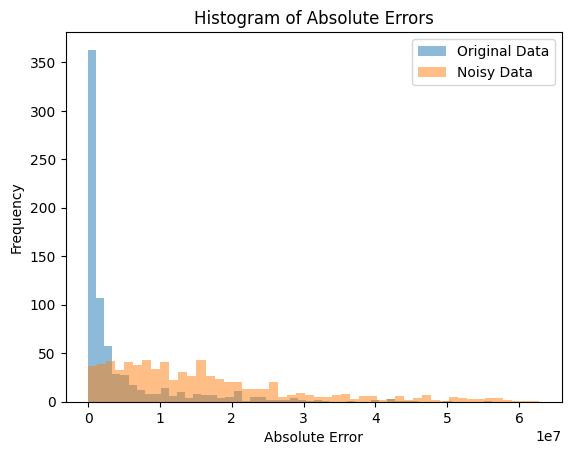

(array([ 56,  57,  70, 135, 161, 171, 178, 182, 204, 205, 224, 243, 288,
       299, 327, 329, 365, 366, 375, 421, 451, 453, 551, 665, 684, 705,
       709, 725]),)
Pitch Angle Range: 86.5 to 87.0
Mean Absolute Error: 42128292.39912869
(array([ 16,  61, 113, 131, 134, 138, 186, 191, 216, 253, 291, 293, 387,
       461, 468, 501, 528, 546, 569, 587]),)
Pitch Angle Range: 87.0 to 87.5
Mean Absolute Error: 19938177.81175945
(array([ 12,  27,  60, 107, 163, 227, 232, 286, 343, 345, 355, 364, 420,
       441, 462, 499, 529, 606, 613, 619, 680, 685]),)
Pitch Angle Range: 87.5 to 88.0
Mean Absolute Error: 6900848.861827883
(array([  0,  20,  26,  71,  79, 104, 238, 315, 323, 352, 358, 396, 431,
       443, 471, 491, 532, 600, 630, 643, 648, 718]),)
Pitch Angle Range: 88.0 to 88.5
Mean Absolute Error: 5718892.607217247
(array([  7, 156, 281, 399, 463, 505, 540, 543, 671, 692, 712]),)
Pitch Angle Range: 88.5 to 89.0
Mean Absolute Error: 11296967.04072081
(array([ 54,  65, 146, 147, 213, 250, 26

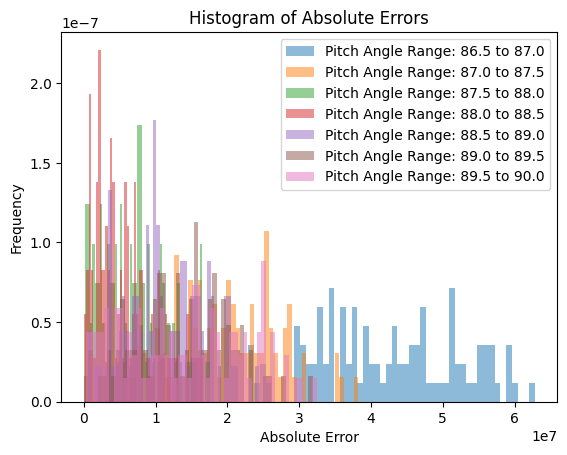

In [44]:
# predict on all test data

predictions = xgb_model.predict(X_test)

differences = np.abs(predictions.flatten() - y_test)

print("Mean Absolute Error on Test Data:", np.mean(differences))

hist_vals = differences

hist_vals = np.load("XGBoost_histogram_data.npy")


plt.hist(hist_vals, bins=50, alpha=0.5, label="Original Data")
plt.hist(differences, bins=50, alpha=0.5, label="Noisy Data")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.legend()
plt.show()

pitch_angle_range = np.arange(86.5, 90.5, 0.5)

# get predictions for each pitch angle range

for i in range(len(pitch_angle_range) - 1):
    lower_bound = pitch_angle_range[i]
    upper_bound = pitch_angle_range[i + 1]
    
    indices = np.where((z_test >= lower_bound) & (z_test < upper_bound))[0]
    
    lower_ind = np.where(z_test == lower_bound)
    
    print(lower_ind)
    
    if len(indices) == 0:
        continue
    
    print("Pitch Angle Range:", lower_bound, "to", upper_bound)
    
    subset_X = X_test[indices]
    subset_y = y_test[indices]
    
    predictions = xgb_model.predict(subset_X)
    
    differences = np.abs(predictions.flatten() - subset_y)
    
    print("Mean Absolute Error:", np.mean(differences))
    
    plt.hist(differences,alpha=0.5, bins=50, label="Pitch Angle Range: " + str(lower_bound) + " to " + str(upper_bound), density=True)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Histogram of Absolute Errors")
plt.legend()
plt.show()
    


In [ ]:
# list of all file names in directory and subdirectories
directory = '../../../../Desktop/BatchCreatedFiles/Harmonic/'


# truth_dir = 



file_list = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".h5"):
            file_list.append(os.path.join(root, file))

print(len(file_list))


print(file_list)


fft_data_new = []
carrier_data_new = []
pitch_angle_data_new = []

for i, file in enumerate(file_list):
    strings, attributes, attributes_values = get_attributes(file, full_path=True)
    signal = get_signal(file, strings[0])
    
    carrier_data_new.append(attributes_values[0][2])
    pitch_angle_data_new.append(attributes_values[0][5])
    
    fft = np.fft.fft(signal, norm='forward')
    
    fft_len = len(fft)
    fft = np.abs(fft[0:fft_len//2])
    
    # normalise fft for max of 1
    fft = fft / np.max(fft)
    
    fft_data_new.append(fft)
    
    if i % 100 == 0:
        print("Processed", i, "files")
        
print("Shape of fft_data:", np.shape(fft_data))
print("Shape of carrier_data:", np.shape(carrier_data))

3713
['../../../../Desktop/BatchCreatedFiles/Harmonic/89.9deg_x0.00090/out_72322313-628b-49d5-98ea-30092d476c8d.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.9deg_x0.00405/out_5ea119f4-879b-4b81-a2a4-20b6bf0d96d5.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.1deg_x0.00335/out_d48a40fc-f4f9-41d1-88b1-9c84719c50c0.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.6deg_x0.00320/out_e1f003b5-d258-48c6-936b-3cb6c76777f4.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/87.2deg_x0.00310/out_ed6c23d8-d2c8-422d-a095-cc6ea811522e.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/88.5deg_x0.00305/out_fb425a53-8773-44c8-a7e9-2f4fd7bd66ab.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/89.6deg_x0.00195/out_9c0de879-7e39-4dc5-9be8-b0cc6f22d77a.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/86.6deg_x0.00500/out_cb4e57ab-eeee-4423-b5cf-5e29296eb595.h5', '../../../../Desktop/BatchCreatedFiles/Harmonic/90.0deg_x0.00025/out_04b05ddb-6032-4e38-8244-83ec53510e5e.

In [59]:
# find peak values of each fft and distance between them for each fft

peak_values = []
peak_distances = []

threshold = 0.1

for i in range(len(fft_data_new)):
    fft = fft_data_new[i]
    
    peaks = np.where(fft > threshold)[0]
    distances = np.diff(peaks)
    
    peak_values.append(peaks)
    peak_distances.append(distances)

In [66]:
fft_freqs = np.fft.fftfreq(40960, d=1e-9)

print(fft_freqs)

[     0.      24414.0625  48828.125  ... -73242.1875 -48828.125
 -24414.0625]


In [69]:
# cut all distances below 10
peak_distances = [np.delete(distances, np.where(distances < 10)) for distances in peak_distances]

# flatten peak distances to get all distances in 1d array

# peak_distances = np.concatenate(peak_distances)

peaks_distances_true = np.array(peak_distances) * np.float(24414.0625)

/var/folders/cl/l2qg34px6s96_4z813158xdh0000gn/T/ipykernel_2104/1341749944.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  peaks_distances_true = np.array(peak_distances) * np.float(24414.0625)


(array([6.063e+03, 4.717e+03, 4.305e+03, 4.593e+03, 4.792e+03, 5.661e+03,
        3.678e+03, 3.051e+03, 2.582e+03, 2.386e+03, 2.420e+03, 2.238e+03,
        1.962e+03, 2.058e+03, 2.336e+03, 2.646e+03, 8.910e+02, 6.900e+01,
        1.900e+01, 1.600e+01, 1.100e+01, 1.300e+01, 9.000e+00, 1.100e+01,
        9.000e+00, 2.600e+01, 1.600e+01, 0.000e+00, 3.000e+00, 6.000e+00,
        6.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.44140625e+05, 3.71679688e+06, 7.18945312e+06, 1.06621094e+07,
        1.41347656e+07, 1.76074219e+07, 2.10800781e+07, 2.45527344e+07,
        2.80253906e+07, 3.14980469e+07, 3.49707031e+07, 3.84433594e+07,
        4.19160156e+07, 4.53886719e+07, 4.88613281e+07, 5.23339844e+07,
        5.58066406e+07, 5.92792969e+07, 6.27519531e+07, 6.62246094e+07,
        6.969726

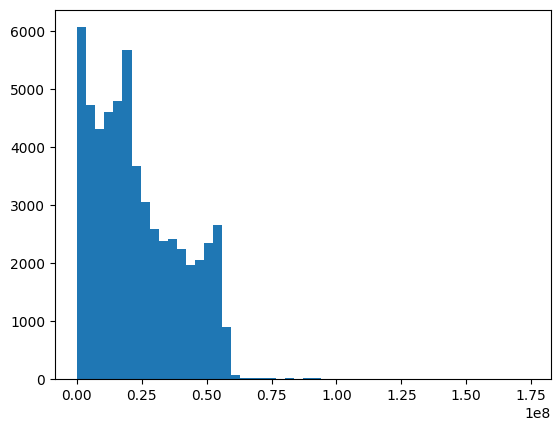

In [73]:
plt.hist(peaks_distances_true, bins=50)

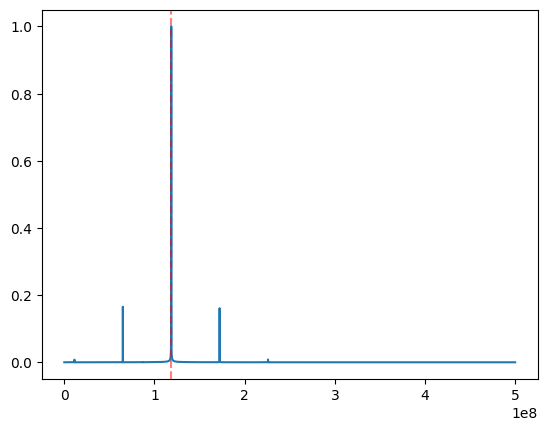

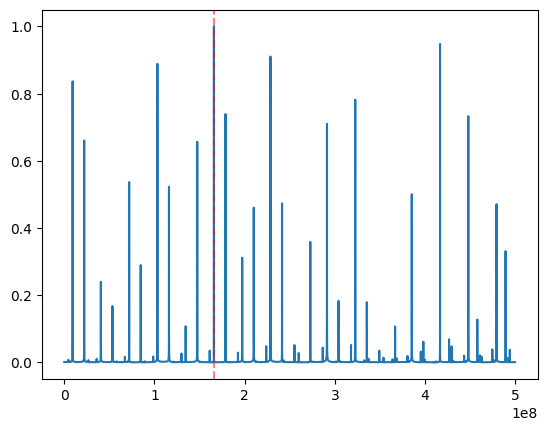

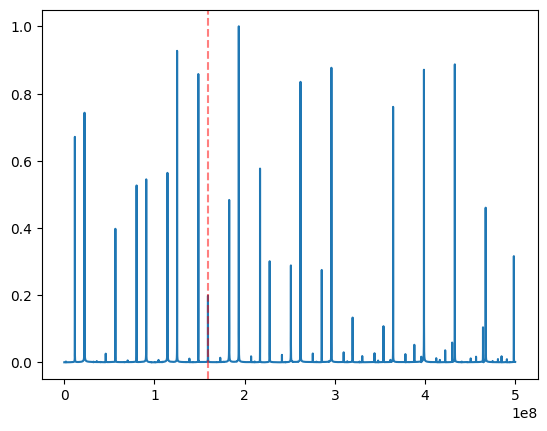

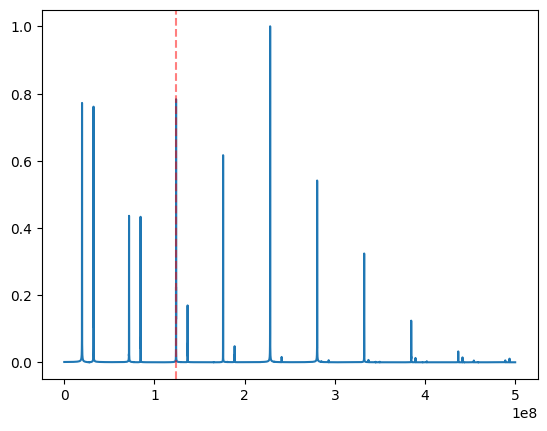

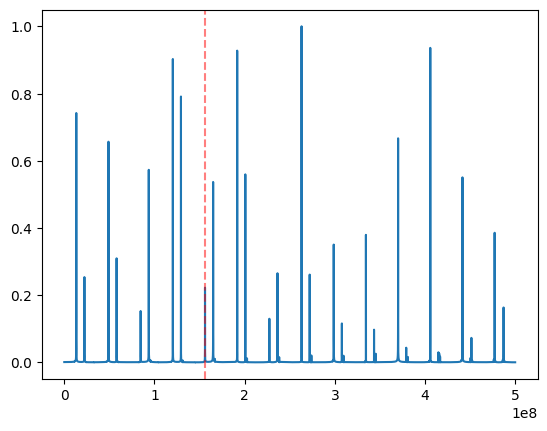

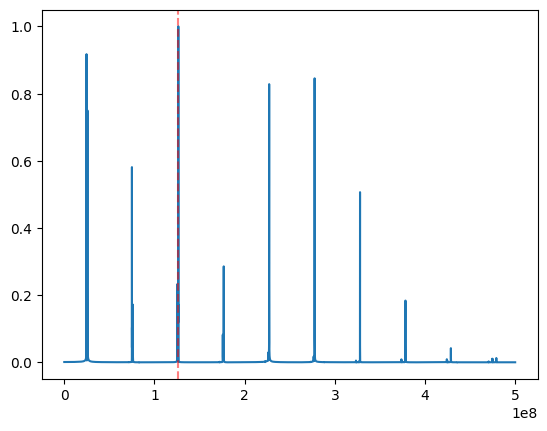

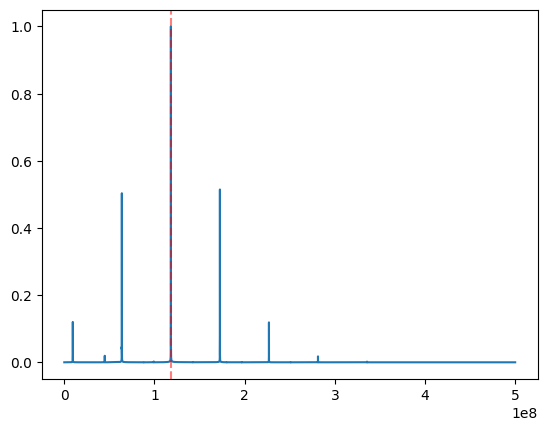

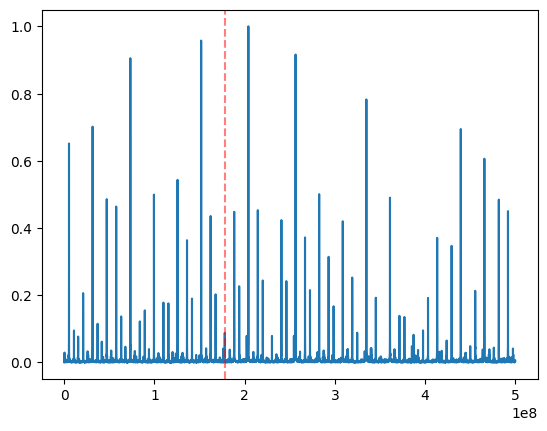

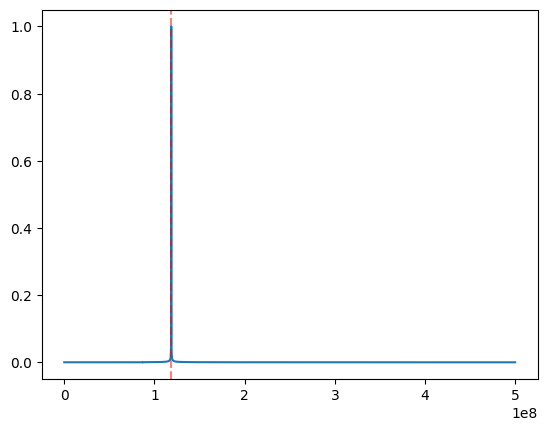

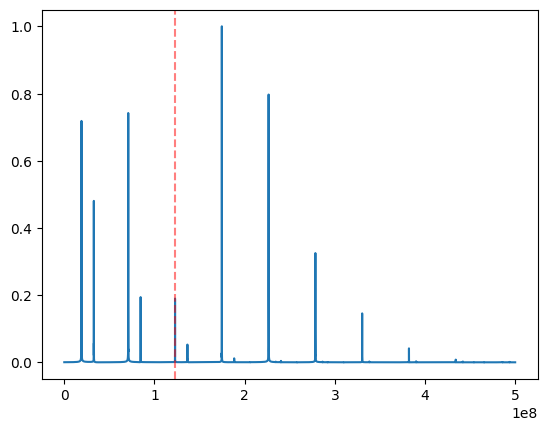

In [78]:
for i in range(10):
    plt.plot(fft_freqs[:20480], fft_data_new[i])
    
    plt.axvline(carrier_data_new[i], color='r', linestyle='--', alpha=0.5)
    
    plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

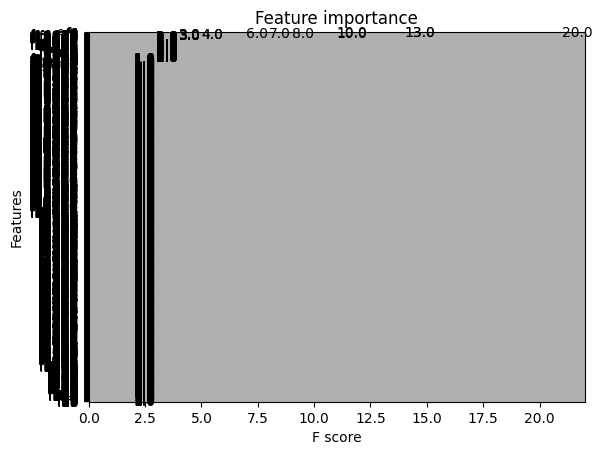

In [79]:
from xgboost import plot_importance
plot_importance(xgb_model, importance_type='weight')  # weight, gain, or cover


In [81]:
# import shap

# explainer = shap.Explainer(xgb_model)
# shap_values = explainer(X_test)

xgb_model.save_model("XGBoost_model_noise.json")

In [82]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(xgb_model, X_train, features=[0, 1, 2], grid_resolution=50)

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/Users/nathan/miniforge3/lib/python3.10/site-packages/sklearn/inspection/__init__.py)

In [85]:
np.save("x_test.npy", X_test)

In [1]:
carrier_data_new = np.array(carrier_data_new)
np.save("carrier_data_new.npy", carrier_data_new)

NameError: name 'np' is not defined